In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data and EDA

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

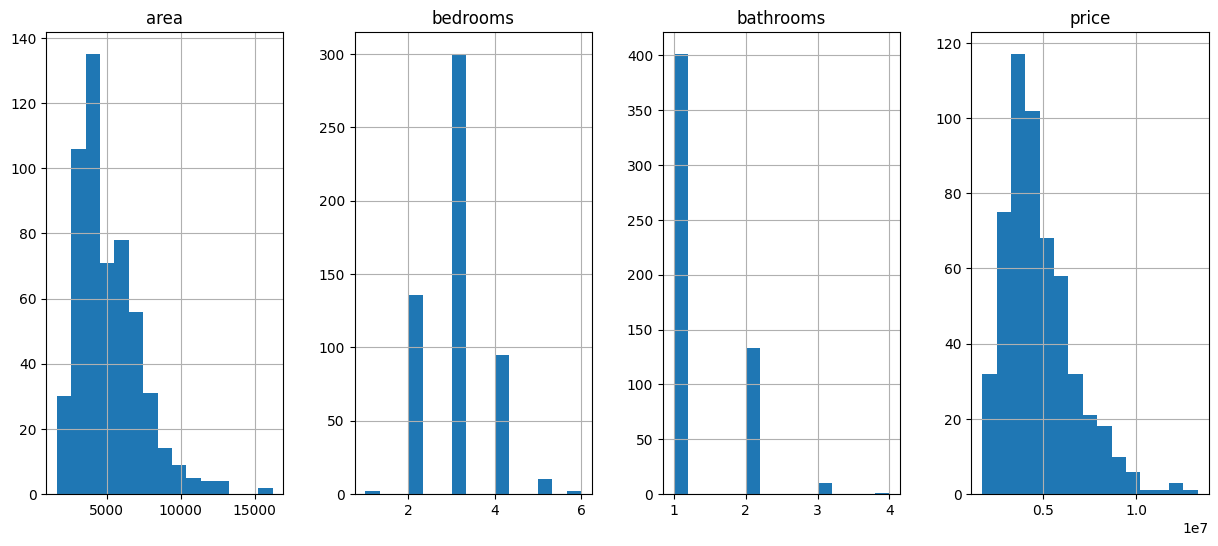

In [5]:
df[['area', 'bedrooms', 'bathrooms','price']].hist(bins=15, figsize=(15, 6), layout=(1, 4))
plt.show()

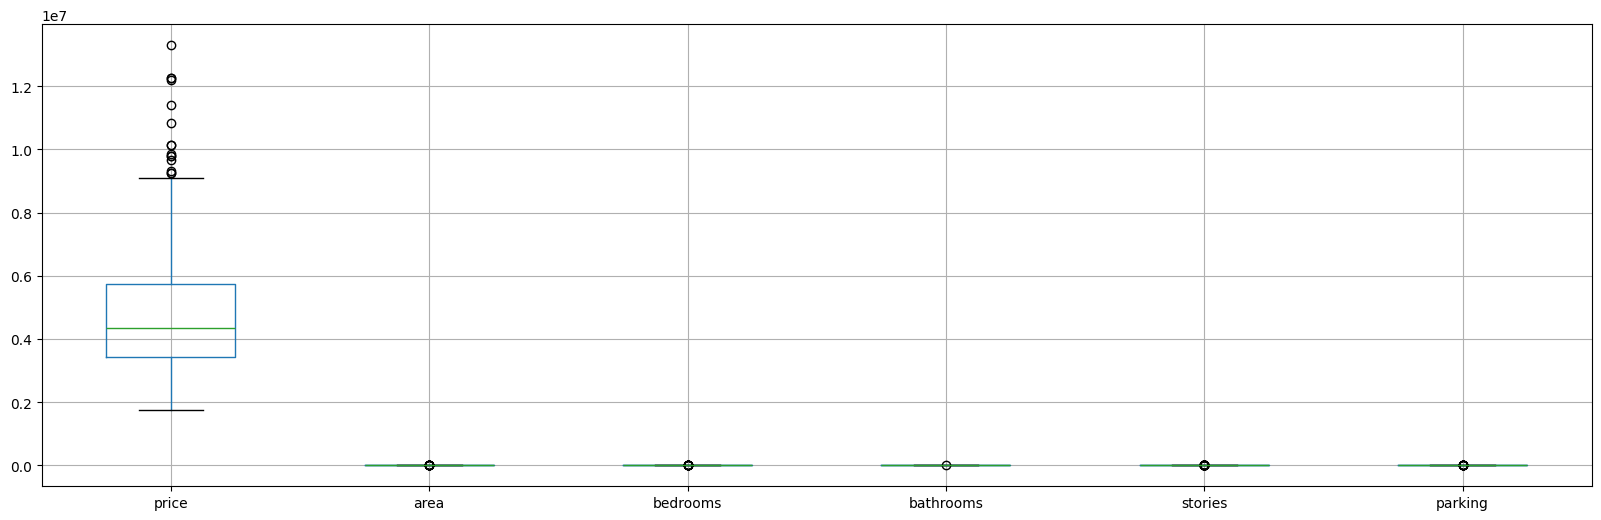

In [6]:
df.boxplot(figsize=(20,6))
plt.show()

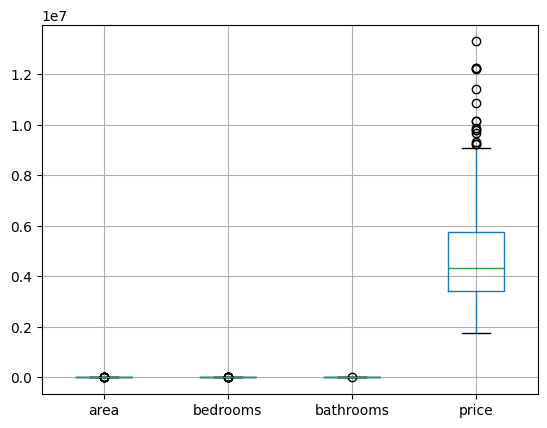

In [7]:
df[['area', 'bedrooms', 'bathrooms','price']].boxplot()
plt.show()

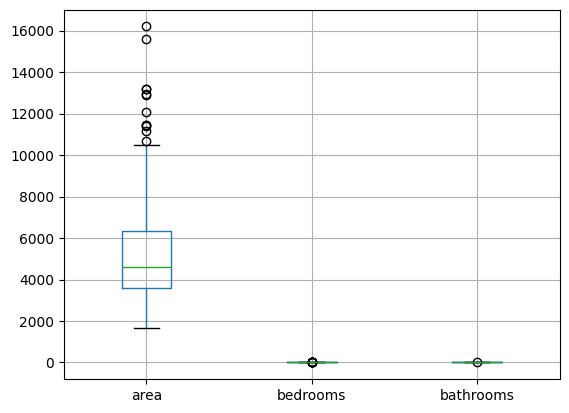

In [8]:
df[['area', 'bedrooms', 'bathrooms']].boxplot()
plt.show()

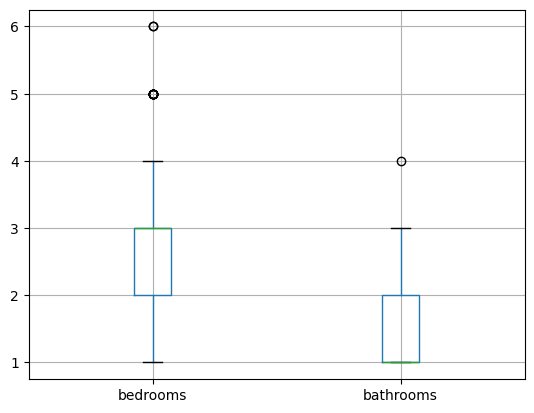

In [9]:
df[['bedrooms', 'bathrooms']].boxplot()
plt.show()

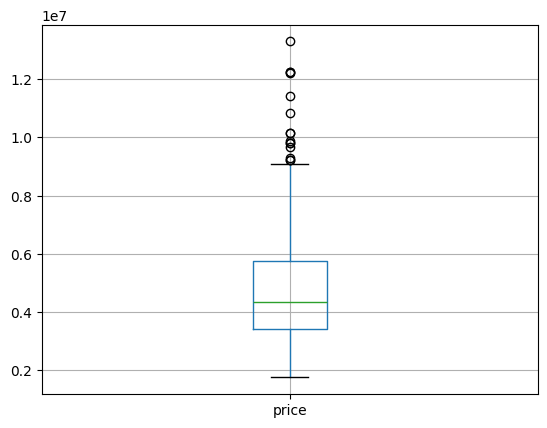

In [10]:
df[['price']].boxplot()
plt.show()

In [11]:
df.shape

(545, 13)

# Different processing

In [12]:
# Handling categorical variables
categorical_yes_no = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[categorical_yes_no] = df[categorical_yes_no].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Handling 'furnishingstatus' with one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True, dtype='uint8')

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Get features and label

In [14]:
# Define features and target
X = df.drop('price', axis=1)
y = df['price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


# All other columns are binary/one-hot, keep them as-is
categorical_features = [col for col in X_train.columns if col not in numeric_features]
categorical_features


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [18]:
from sklearn.compose import ColumnTransformer

# Use a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

# Fit on training data and transform both train and test sets
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [19]:
X_test.shape

(109, 13)

In [20]:
pd.DataFrame(X_test_scaled, columns=[numeric_features+categorical_features]).head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.338750,1.394055,1.539173,0.254215,0.367957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.611257,0.055271,1.539173,1.420929,-0.803059,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.506019,-1.283514,-0.557950,-0.912499,-0.803059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.070009,0.055271,-0.557950,0.254215,-0.803059,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.542353,0.055271,-0.557950,-0.912499,-0.803059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Log-transforming price to reduce skew

y_train_log = np.log1p(y_train)  # log(1 + price) to handle zero values if any
y_test_log = np.log1p(y_test)


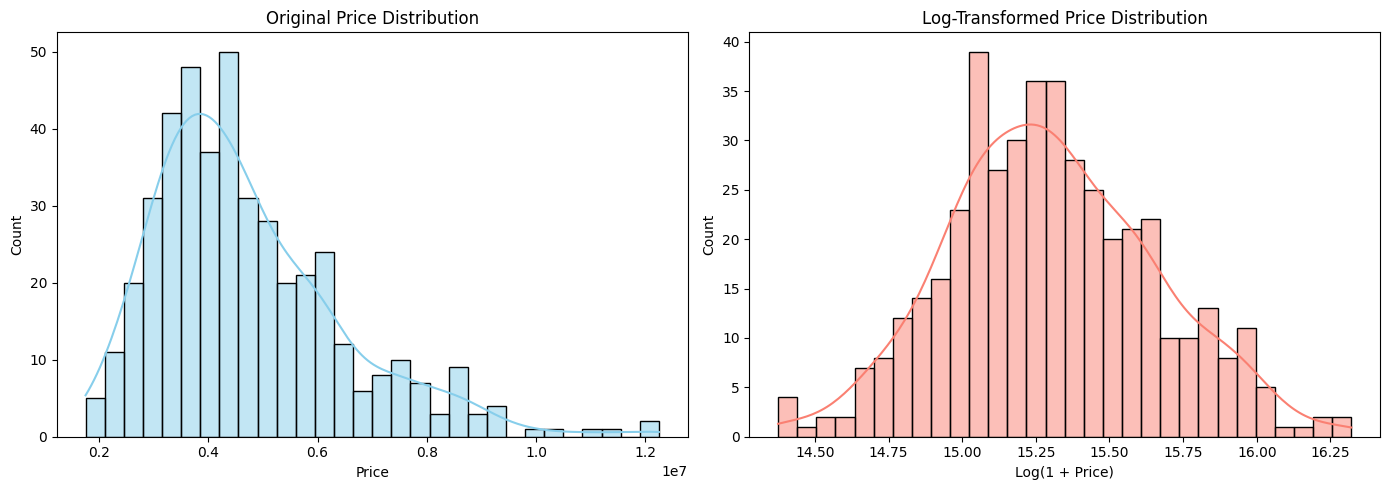

In [22]:
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, color='skyblue', bins=30)
plt.title('Original Price Distribution')
plt.xlabel('Price')

# Log-transformed price distribution
plt.subplot(1, 2, 2)
sns.histplot(y_train_log, kde=True, color='salmon', bins=30)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(1 + Price)')

plt.tight_layout()
plt.show()


<Axes: >

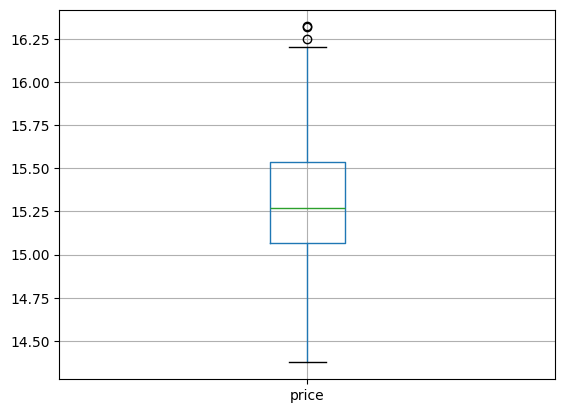

In [23]:
pd.DataFrame(y_train_log).boxplot()

# Model 1: Linear Regression

In [25]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,0,0,0,1,1,0,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1,0
335,3816,2,1,1,1,0,1,0,1,2,0,0,0
412,2610,3,1,2,1,0,1,0,0,0,1,0,1
471,3750,3,1,2,1,0,0,0,0,0,0,0,1


In [26]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.384168,0.055271,1.539173,2.587644,0.367957,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.929181,0.055271,1.539173,-0.912499,2.709987,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.607755,-1.283514,-0.557950,-0.912499,1.538972,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.155492,0.055271,-0.557950,0.254215,-0.803059,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.637730,0.055271,-0.557950,0.254215,-0.803059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Train

In [27]:
# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict and evaluate
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Linear Regression MSE: {mse_lin}")

Linear Regression MSE: 1754318687330.6628


In [29]:
# Train Linear Regression model
lin_regS = LinearRegression()
lin_regS.fit(X_train_scaled, y_train_log)

# Predict and evaluate
y_pred_linS = lin_regS.predict(X_test_scaled)
mse_linS = mean_squared_error(y_test_log, y_pred_linS)
print(f"Linear Regression MSE: {mse_linS}")

Linear Regression MSE: 0.06329354097113263


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred_linS)))
print("R² Score:", r2_score(y_test_log, y_pred_linS))

RMSE: 0.2515820760132419
R² Score: 0.6722047416501389


# Model 2: Polynomial Regression

In [31]:
# Generate polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [32]:
# Train Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_log)

LinearRegression()

In [33]:
# Predict and evaluate
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test_log, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_poly}")


Polynomial Regression MSE: 0.07477904249218695


# Model 3: SVR

In [34]:
# Train SVM model
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train_scaled, y_train_log)

SVR(kernel='linear')

In [35]:
# Predict and evaluate
y_pred_svm = svm_reg.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test_log, y_pred_svm)
print(f"SVM Regression MSE: {mse_svm}")


SVM Regression MSE: 0.06510619828154038


## Un scaled

In [36]:
# Train SVM model
svm_regU = SVR(kernel='linear')
svm_regU.fit(X_train, y_train)

SVR(kernel='linear')

In [37]:
# Predict and evaluate
y_pred_svmU = svm_regU.predict(X_test)
mse_svmU = mean_squared_error(y_test, y_pred_svmU)
print(f"SVM Regression MSE: {mse_svmU}")

SVM Regression MSE: 3765422307563.22


# Visualization

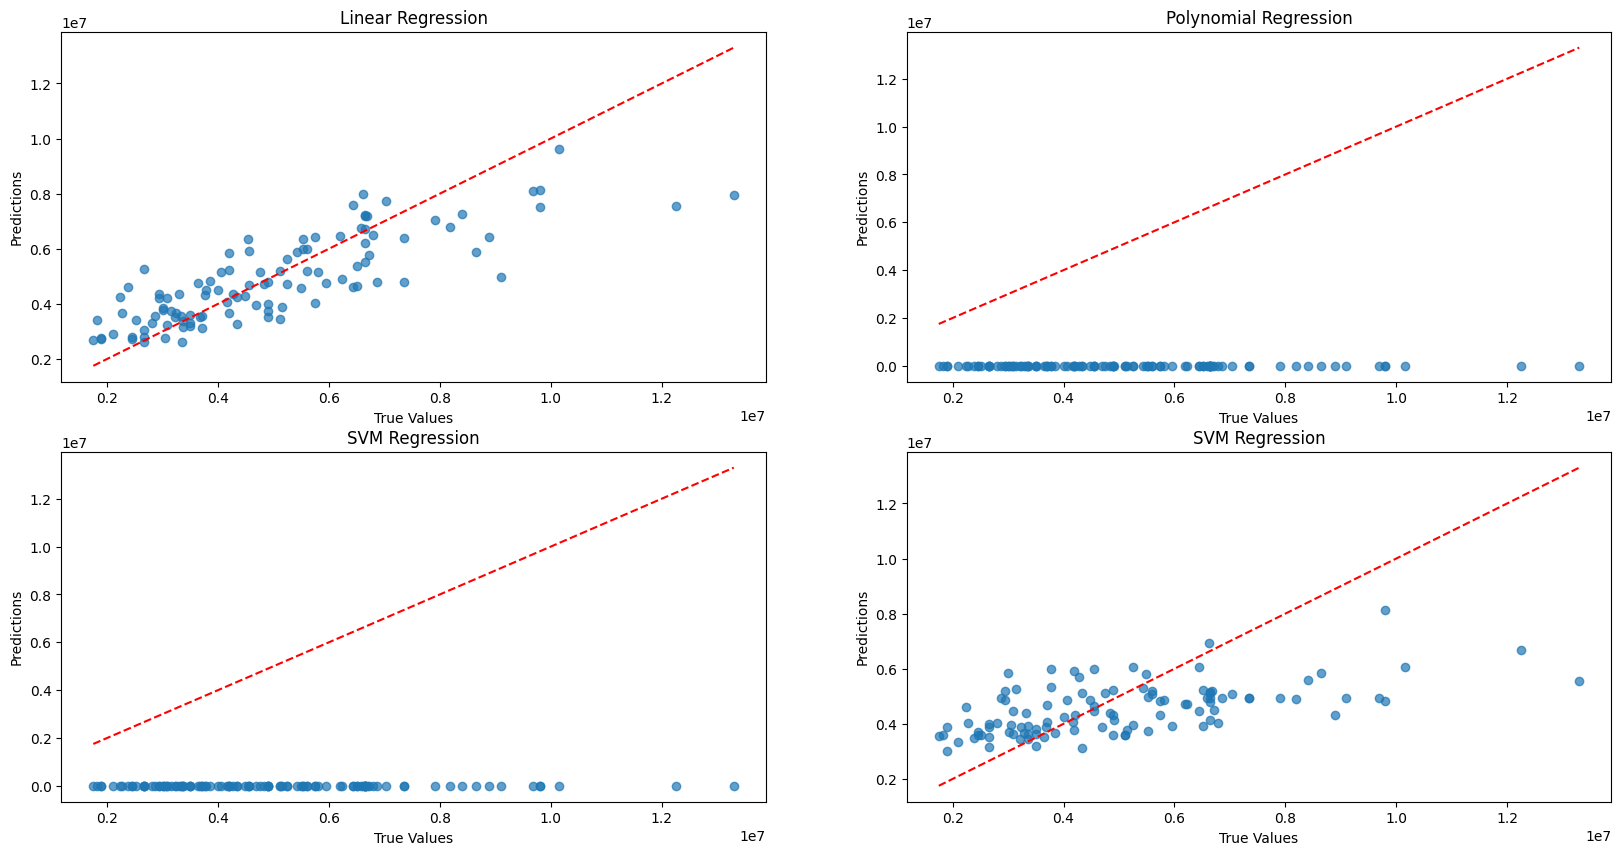

In [38]:
plt.figure(figsize=(20, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')

# Polynomial Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression')

# SVM Regression
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_svm, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVM Regression')

# SVM Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_svmU, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVM Regression')


plt.show()


In [39]:
y_test.head()

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
Name: price, dtype: int64

In [40]:
y_pred_svm

array([15.33026898, 15.78490211, 15.00971434, 15.31270078, 15.03661163,
       15.05323677, 15.4725367 , 15.65251525, 14.84956527, 14.86296351,
       16.24458873, 14.90508755, 14.93630064, 15.04602342, 15.10226689,
       15.33031447, 14.99712406, 15.29431582, 15.22333289, 15.09789957,
       15.49110968, 15.58434062, 14.89226469, 15.30625623, 15.42493838,
       15.86241149, 15.0168589 , 15.42120207, 15.97483877, 15.04981299,
       15.67909518, 15.00693842, 15.69960787, 15.2275645 , 15.067721  ,
       15.53002783, 15.36167967, 15.24732217, 14.94830268, 15.28467391,
       15.2827452 , 15.04920894, 15.78130271, 15.16308434, 15.13164391,
       15.18714711, 15.7149258 , 15.19798478, 15.09027652, 15.02958996,
       15.75439243, 14.89954475, 15.22171286, 15.26681197, 15.1102196 ,
       14.87241193, 15.81545816, 14.93806368, 15.24294097, 14.89905856,
       15.33639006, 15.00802692, 15.38493586, 15.20261396, 15.26317965,
       15.26431459, 15.78156141, 15.0586242 , 15.49864788, 15.61

In [41]:
pd.DataFrame(y_pred_svmU).head()

,0
0,4.881901e+06
1,5.148596e+06
2,4.055202e+06
3,4.481988e+06
4,4.019750e+06


# KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Create k-NN regressor object
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train_scaled, y_train_log)

KNeighborsRegressor()

In [43]:
# Make predictions
y_pred = knn_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_log, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.07618193013875471


In [44]:
from sklearn.neighbors import KNeighborsRegressor

# Create k-NN regressor object
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_reg.fit(X_train_scaled, y_train_log)

KNeighborsRegressor(n_neighbors=3)

In [45]:
# Make predictions
y_pred = knn_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_log, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.08016363520650194


In [46]:
#Unscaled

from sklearn.neighbors import KNeighborsRegressor

# Create k-NN regressor object
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [47]:
# Make predictions
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3203176626422.0186


# Model 3: Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_reg.fit(X_train_scaled, y_train_log)

Lasso(alpha=0.1)

In [49]:
y_pred = lasso_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test_log, y_pred)
print(f"LASSO Regression MSE: {mse}")

print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_pred)))
print("R² Score:", r2_score(y_test_log, y_pred))

LASSO Regression MSE: 0.1361602390411556
RMSE: 0.3689989688890141
R² Score: 0.29483040372427805


## Adjusting alpha parameter

In [50]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train_scaled, y_train_log)
y_predLasso = lasso_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test_log, y_predLasso)
print(f"LASSO Regression MSE: {mse}")

print("RMSE:", np.sqrt(mean_squared_error(y_test_log, y_predLasso)))
print("R² Score:", r2_score(y_test_log, y_predLasso))

LASSO Regression MSE: 0.07202046739592778
RMSE: 0.2683662933304549
R² Score: 0.6270082641245622


In [51]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
# Calculate RMSE
rmse = root_mean_squared_error(y_test_log, y_predLasso)

# Calculate MAE
mae = mean_absolute_error(y_test_log, y_predLasso)

# Calculate R-squared
r_squared = r2_score(y_test_log, y_predLasso)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

RMSE: 0.2683662933304549
MAE: 0.2122286246105382
R-squared: 0.6270082641245622


# Model 4: Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_reg.fit(X_train_scaled, y_train_log)

Ridge()

In [53]:
# Predict and evaluate
y_predRidge = ridge_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test_log, y_predRidge)
print(f"Ridge Regression MSE: {mse}")

Ridge Regression MSE: 0.06345829188016752


In [54]:
# Calculate RMSE
rmse = root_mean_squared_error(y_test_log, y_predRidge)

# Calculate MAE
mae = mean_absolute_error(y_test_log, y_predRidge)

# Calculate R-squared
r_squared = r2_score(y_test_log, y_predRidge)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

RMSE: 0.25190929296111236
MAE: 0.2001691623197573
R-squared: 0.6713515018730327


In [55]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train_scaled, y_train_log)
# Predict and evaluate
y_predRidge = ridge_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = root_mean_squared_error(y_test_log, y_predRidge)

# Calculate MAE
mae = mean_absolute_error(y_test_log, y_predRidge)

# Calculate R-squared
r_squared = r2_score(y_test_log, y_predRidge)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

RMSE: 0.25161526375745574
MAE: 0.1999303187816673
R-squared: 0.6721182529550389


In [56]:
ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train_scaled, y_train_log)
# Predict and evaluate
y_predRidge = ridge_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = root_mean_squared_error(y_test_log, y_predRidge)

# Calculate MAE
mae = mean_absolute_error(y_test_log, y_predRidge)

# Calculate R-squared
r_squared = r2_score(y_test_log, y_predRidge)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")

RMSE: 0.2515853996089623
MAE: 0.19990545275123156
R-squared: 0.6721960807301608


In [57]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error') #  because it's common to consider MSE as a loss function (lower is better)

# Convert scores to positive MSE
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
print('The accuracies: ', mse_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean Squared Error from 5-fold CV:", mean_mse)
print("Standard Deviation of MSE from 5-fold CV:", std_mse)

The accuracies:  [6.85881616e+12 9.52137928e+11 8.73716064e+11 8.68982894e+11
 1.04858231e+12]
Mean Squared Error from 5-fold CV: 2120447069698.9966
Standard Deviation of MSE from 5-fold CV: 2370083656888.455


In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_log = np.log1p(y)

In [59]:
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_scaled, y_log, cv=5, scoring='neg_mean_squared_error') #  because it's common to consider MSE as a loss function (lower is better)

# Convert scores to positive MSE
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
print('The accuracies: ', mse_scores)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean Squared Error from 5-fold CV:", mean_mse)
print("Standard Deviation of MSE from 5-fold CV:", std_mse)

The accuracies:  [0.12791625 0.03541888 0.03383629 0.0344389  0.12294919]
Mean Squared Error from 5-fold CV: 0.07091190237894983
Standard Deviation of MSE from 5-fold CV: 0.044546627815881465


In [60]:
ridge_reg = Ridge(alpha=0.01)
# Perform 5-fold cross-validation
scores = cross_val_score(ridge_reg, X_scaled, y_log, cv=5, scoring='neg_mean_squared_error') #  because it's common to consider MSE as a loss function (lower is better)

# Convert scores to positive MSE
mse_scores = -scores

# Calculate the mean and standard deviation of the MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean Squared Error from 5-fold CV:", mean_mse)
print("Standard Deviation of MSE from 5-fold CV:", std_mse)

Mean Squared Error from 5-fold CV: 0.0709127975912317
Standard Deviation of MSE from 5-fold CV: 0.044548559726817455


## Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': [1, 5, 10],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') # to maximize the score, so using negative MSE allows it to "minimize" the MSE effectively.

# Fit GridSearchCV
grid_search_rf.fit(X_scaled, y_log)

# Retrieve the best parameters and the best score
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Convert from negative MSE to positive

print("Best parameters:", best_params)
print("Best cross-validation MSE:", best_score)

In [64]:
# Evaluate on the test set
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train_scaled, y_train_log)
y_pred = rf_best.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_log, y_pred)
test_r2 = r2_score(y_test_log, y_pred)
print("Test MSE:", test_mse)
print("Test R2:", test_r2)

Test MSE: 0.07264979461159074
Test R2: 0.6237489982645761


In [65]:
# Define a range of possible values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 30)}

# Create a GridSearchCV object
knn_gscv = GridSearchCV(knn_reg, param_grid, cv=5)

# Fit model to data
knn_gscv.fit(X_scaled, y_log)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [66]:
# Check top-performing n_neighbors value
best_n_neighbors = knn_gscv.best_params_['n_neighbors']
best_score = knn_gscv.best_score_
print(f'Best n_neighbors: {best_n_neighbors}')
print(f'Best cross-validation score: {best_score}') # R-squared

Best n_neighbors: 29
Best cross-validation score: -8.84541024404926


In [67]:
# Re-train and evaluate the model with the best parameters
knn_reg_best = KNeighborsRegressor(n_neighbors=best_n_neighbors)
knn_reg_best.fit(X_train_scaled, y_train_log)
y_pred_best = knn_reg_best.predict(X_test_scaled)
mse_best = mean_squared_error(y_test_log, y_pred_best)
print(f'Mean Squared Error with best K: {mse_best}')


Mean Squared Error with best K: 0.08480712408316342


# Ensemble learning

## Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the base estimator
base_estimator = DecisionTreeRegressor(random_state=42)

# Create a Bagging ensemble of 100 Decision Trees
# bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_model = BaggingRegressor(n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train_scaled, y_train_log)

# Predict and evaluate the model
predictions = bagging_model.predict(X_test)
mse = mean_squared_error(y_test_log, predictions)
print(f'Bagging MSE: {mse}')


## AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostRegressor

# Create AdaBoost ensemble of decision stumps
ada_boost = AdaBoostRegressor(n_estimators=50, random_state=42)
# ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42) # if classification task

# Train the model
ada_boost.fit(X_train_scaled, y_train_log)

# Predict and evaluate the model
predictions = ada_boost.predict(X_test_scaled)
mse = mean_squared_error(y_test_log, predictions)
print(f'Bagging MSE: {mse}')


Bagging MSE: 0.08007364783747639


## Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gradient_boosting.fit(X_train_scaled, y_train_log)

# Predict and evaluate the model
gb_predictions = gradient_boosting.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test_log, gb_predictions)
print(f'Gradient Boosting MSE: {gb_mse}')

Gradient Boosting MSE: 0.0632425808200913


## XGBOOST

In [71]:
# pip install xgboost

In [85]:
import xgboost as xgb

# Instantiate an XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train_scaled, y_train_log)

# Predict on test set
preds = xg_reg.predict(X_test_scaled)

# Compute the rmse
rmse = np.sqrt(mean_squared_error(y_test_log, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.384055


## Combining Models with Stacking

In [86]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the stack of models
estimators = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), cv=5)
stacking_regressor.fit(X_train_scaled, y_train_log)

# Predict and evaluate the stacking model
stacked_predictions = stacking_regressor.predict(X_test_scaled)
stacked_mse = mean_squared_error(y_test_log, stacked_predictions)
print(f'Stacked Model MSE: {stacked_mse}')


Stacked Model MSE: 0.06504556090953857
